# Домашнее задание к лекции "Базовые понятия статистики"

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: (0)`surgery?`, (1)`Age`, (3)`rectal temperature`, (4)`pulse`, (5)`respiratory rate`, (6)`temperature of extremities`, (10)`pain`, (22)`outcome`. 

#### 1.1. Загрузим набор данных

In [522]:
'''
How to read csv file with Pandas without header?
https://www.geeksforgeeks.org/how-to-read-csv-file-with-pandas-without-header/


'''
import pandas as pd

df = pd.read_csv('horse_data.csv', header=None, na_values='null', sep=',')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


#### 1.2. Оставить 8 столбцов по ТЗ для дальнейшего изучения

In [523]:
'''
Selecting multiple columns in a Pandas dataframe
https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

Interesting Ways to Select Pandas DataFrame Columns
https://towardsdatascience.com/interesting-ways-to-select-pandas-dataframe-columns-b29b82bbfb33
'''
df_target = df[[0, 1, 3, 4, 5, 6, 10, 22]]
df_target

,0,1,3,4,5,6,10,22
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
...,...,...,...,...,...,...,...,...
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [524]:
'''
pandas: Rename columns / index names (labels) of DataFrame
https://note.nkmk.me/en/python-pandas-dataframe-rename/
'''
df_target.columns = ['surgery?', 'age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']
df_target

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
...,...,...,...,...,...,...,...,...
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

#### 2.1 Проанализируем значения по столбцам

In [525]:
df_target.dtypes

surgery?                      object
age                            int64
rectal temperature            object
pulse                         object
respiratory rate              object
temperature of extremities    object
pain                          object
outcome                       object
dtype: object

In [526]:
'''
unique values in each column pandas
https://www.codegrepper.com/code-examples/python/unique+values+in+each+column+pandas
'''
for col in df_target:
    print('%s : %s' % (df_target[col].name, df_target[col].unique()))

surgery? : ['2' '1' '?']
age : [1 9]
rectal temperature : ['38.50' '39.2' '38.30' '39.10' '37.30' '?' '37.90' '38.10' '37.20'
 '38.00' '38.2' '37.60' '37.50' '39.4' '39.90' '38.40' '38.60' '38.3'
 '38.1' '37.80' '37.7' '37.70' '38.20' '37.8' '39.20' '39.00' '35.4'
 '38.90' '37.40' '40.30' '37.9' '37.00' '39.7' '37.6' '38.7' '36.40'
 '37.3' '38.0' '38.80' '39.60' '36.80' '38.4' '39.50' '36.5' '39.40'
 '38.70' '37.4' '38' '36.00' '37.1' '38.9' '39.30' '38.8' '39.5' '37.5'
 '38.5' '37.10' '36.10' '39.3' '36.60' '40.80' '36.90' '38.6' '40.00'
 '36.50' '37.2']
pulse : ['66' '88' '40' '164' '104' '?' '48' '60' '80' '90' '72' '42' '92' '76'
 '96' '128' '64' '110' '130' '108' '100' '112' '52' '146' '150' '120'
 '140' '84' '46' '114' '160' '54' '56' '38' '98' '50' '44' '70' '78' '49'
 '30' '136' '132' '65' '86' '129' '68' '36' '45' '124' '184' '75' '82']
respiratory rate : ['28' '20' '24' '84' '35' '?' '16' '36' '12' '52' '48' '21' '60' '34' '42'
 '30' '96' '72' '15' '44' '32' '22' '18' '80' '4

In [527]:
'''
Data Cleaning — How to Handle Missing Values with Pandas
https://towardsdatascience.com/data-cleaning-how-to-handle-missing-values-in-pandas-cc8570c446ec
'''
import numpy as np
missing_values = ['?']
df_target = df_target.replace(missing_values, np.NaN)
df_target

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [528]:
df_target.dtypes

surgery?                      object
age                            int64
rectal temperature            object
pulse                         object
respiratory rate              object
temperature of extremities    object
pain                          object
outcome                       object
dtype: object

In [529]:
# convert all columns of DataFrame
df_target = df_target.apply(pd.to_numeric) # convert all columns of DataFrame

In [530]:
df_target.dtypes

surgery?                      float64
age                             int64
rectal temperature            float64
pulse                         float64
respiratory rate              float64
temperature of extremities    float64
pain                          float64
outcome                       float64
dtype: object

#### 2.2 Рассчитаем базовые статистики

In [531]:
'''
Statistical Measures of Central Tendency
https://towardsdatascience.com/statistical-measures-of-central-tendency-d8d4fbb70111

5 Useful Statistics Data Scientists Need to Know
https://towardsdatascience.com/5-useful-statistics-data-scientists-need-to-know-5b4ac29a7da9

Mean, Median & Mode — Which central tendency measure to use & when?
https://towardsdatascience.com/mean-median-mode-which-central-tendency-measure-to-use-when-9fb3ebbe3006

Statistics for Data Science — A beginners guide to Descriptive Statistics in Python
https://towardsdatascience.com/statistics-for-data-science-a-beginners-guide-to-descriptive-statistics-in-python-9e0daa30809a
'''
#Central tendency calculations
print("Mean:");
print(df_target.mean())

print()
print("Median:");
print(df_target.median())

print()
print("Mode:");
print(df_target.mode())

Mean:
surgery?                       1.397993
age                            1.640000
rectal temperature            38.167917
pulse                         71.913043
respiratory rate              30.417355
temperature of extremities     2.348361
pain                           2.951020
outcome                        1.551839
dtype: float64

Median:
surgery?                       1.0
age                            1.0
rectal temperature            38.2
pulse                         64.0
respiratory rate              24.5
temperature of extremities     3.0
pain                           3.0
outcome                        1.0
dtype: float64

Mode:
   surgery?  age  rectal temperature  pulse  respiratory rate  \
0       1.0    1                38.0   48.0              20.0   

   temperature of extremities  pain  outcome  
0                         3.0   3.0      1.0  


In [532]:
df_target.describe()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


#### 2.3 Найдем выбросы

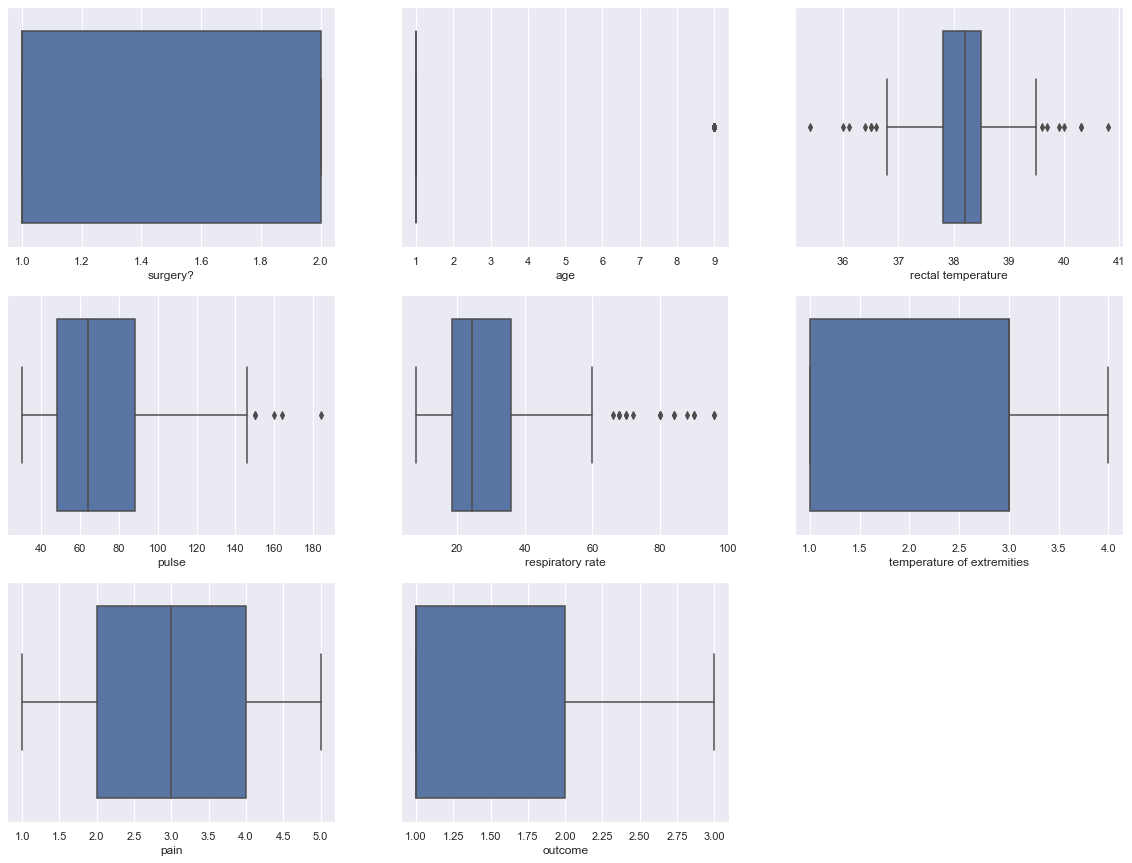

In [533]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_boxplots(df):
    sns.set(color_codes=True) #adds a good background to our plots

    plt.figure(figsize=(20,15))
    pos = 1

    for col in df:
        plt.subplot(3, 3, pos)
        sns.boxplot(df[col])
        pos += 1
        
print_boxplots(df_target)

In [534]:
for col in new_df:
    print('%s : %s' % (new_df[col].name, new_df[col].unique()))

surgery? : [ 2.  1. nan]
age : [1]
rectal temperature : [38.5 39.2 38.3 37.3  nan 37.9 38.1 39.1 37.2 38.2 37.6 37.5 39.4 39.9
 38.4 38.6 37.8 37.7 38.  35.4 38.9 37.4 40.3 39.  37.  38.7 36.4 38.8
 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]
pulse : [ 66.  88.  40. 104.  nan  48.  60.  80.  72.  42.  76.  96.  64. 110.
 108. 100. 112.  52. 120. 140.  84.  46. 114. 130.  54.  56.  38.  98.
  50.  44.  70.  78.  49.  30. 132.  65.  86. 129.  68.  36.  45.  92.
  90.  75.  82.]
respiratory rate : [28. 20. 24. 35. nan 16. 36. 12. 52. 48. 21. 60. 34. 42. 30. 15. 44. 32.
 22. 18. 80. 40. 10. 51. 96. 66. 68.  9. 14. 90.  8. 23. 58. 13. 26. 25.
 50. 70.]
temperature of extremities : [ 3. nan  1.  2.  4.]
pain : [ 5.  3. nan  2.  4.  1.]
outcome : [ 2.  3.  1. nan]


#### 2.4 Изучим выбросы

In [535]:
'''
Detect and Remove Outliers from Pandas DataFrame
https://androidkt.com/detect-and-remove-outliers-from-pandas-dataframe/
'''
'''
0:  surgery?
          1 = Yes, it had surgery
          2 = It was treated without surgery

1:  age
      1 = Adult horse
      2 = Young (< 6 months)
      
2:  rectal temperature
          - linear
          - in degrees celsius.
          - An elevated temp may occur due to infection.
          - temperature may be reduced when the animal is in late shock
          - normal temp is 37.8
          - this parameter will usually change as the problem progresses
               eg. may start out normal, then become elevated because of
                   the lesion, passing back through the normal range as the
                   horse goes into shock
                   
3:  pulse
          - linear
          - the heart rate in beats per minute
          - is a reflection of the heart condition: 30 -40 is normal for adults
          - rare to have a lower than normal rate although athletic horses
            may have a rate of 20-25
          - animals with painful lesions or suffering from circulatory shock
            may have an elevated heart rate
            
4:  respiratory rate
          - linear
          - normal rate is 8 to 10
          - usefulness is doubtful due to the great fluctuations

5:  temperature of extremities
      - a subjective indication of peripheral circulation
      - possible values:
           1 = Normal
           2 = Warm
           3 = Cool
           4 = Cold
      - cool to cold extremities indicate possible shock
      - hot extremities should correlate with an elevated rectal temp.
      
6: pain - a subjective judgement of the horse's pain level
          - possible values:
               1 = alert, no pain
               2 = depressed
               3 = intermittent mild pain
               4 = intermittent severe pain
               5 = continuous severe pain
          - should NOT be treated as a ordered or discrete variable!
          - In general, the more painful, the more likely it is to require
            surgery
          - prior treatment of pain may mask the pain level to some extent
          
7: outcome
          - what eventually happened to the horse?
          - possible values:
               1 = lived
               2 = died
               3 = was euthanized
'''
for col in df_target: 
    Q1 = df_target[col].quantile(0.25)
    Q3 = df_target[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 *IQR
    lower_limit = Q1 - 1.5 * IQR

    is_not_outliers = (df_target[col] >= lower_limit) & (df_target[col] <= upper_limit)
    isNaN = df_target[col].isnull()  

    print("\'%s\' outliers: %s" % (col, len(df_target[col][~is_not_outliers & ~isNaN])))
    print(df_target[col][~is_not_outliers & ~isNaN])
    print()

'surgery?' outliers: 0
Series([], Name: surgery?, dtype: float64)

'age' outliers: 24
3      9
9      9
13     9
16     9
23     9
39     9
41     9
55     9
74     9
75     9
82     9
103    9
109    9
135    9
191    9
212    9
227    9
229    9
244    9
252    9
255    9
262    9
275    9
287    9
Name: age, dtype: int64

'rectal temperature' outliers: 14
20     39.9
44     35.4
54     40.3
75     39.7
80     36.4
91     40.3
99     39.6
118    36.5
141    36.0
238    36.1
251    36.6
259    40.8
281    40.0
298    36.5
Name: rectal temperature, dtype: float64

'pulse' outliers: 5
3      164.0
41     150.0
55     160.0
255    184.0
275    150.0
Name: pulse, dtype: float64

'respiratory rate' outliers: 17
3      84.0
39     96.0
41     72.0
82     80.0
84     80.0
103    68.0
106    96.0
120    66.0
125    68.0
186    90.0
208    80.0
229    70.0
244    88.0
255    84.0
265    68.0
269    90.0
295    70.0
Name: respiratory rate, dtype: float64

'temperature of extremities' outliers: 

#### 2.5 Обработка выбросов

Рекомендую удалить из анализа данные с параметром 'age' = 9, так как значение записано ошибчно.
Следует выяснить причины ошибки

In [536]:
df_target = df_target[df_target['age'] != 9]
df_target['age'].unique()

array([1])

### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

#### 3.1 Рассчитаем количество пропусков для всех выбранных столбцов

In [537]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    275 non-null    float64
 1   age                         276 non-null    int64  
 2   rectal temperature          220 non-null    float64
 3   pulse                       254 non-null    float64
 4   respiratory rate            222 non-null    float64
 5   temperature of extremities  228 non-null    float64
 6   pain                        228 non-null    float64
 7   outcome                     275 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 19.4 KB


In [538]:
'''
How to Count NaN values in Pandas DataFrame
https://datatofish.com/count-nan-pandas-dataframe/
'''
def print_count_of_NaN(df):
    print('Count of NaN:')
    for col in df_target:
        print('%s: %s' % (df[col].name, df[col].isna().sum()))
        
print_count_of_NaN(df_target)

Count of NaN:
surgery?: 1
age: 0
rectal temperature: 56
pulse: 22
respiratory rate: 54
temperature of extremities: 48
pain: 48
outcome: 1


#### 3.2 Примем и обоснуем решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них.

#### 3.3 Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [539]:
'''
Предварительная обработка данных
https://habr.com/ru/post/511132/
'''

'''
Cleaning data plan
surgery? : [ 2.  1. nan]
– пустые значения заменяем модой

age : [1] 
rectal temperature : [38.5 39.2 38.3 37.3  nan 37.9 38.1 39.1 37.2 38.2 37.6 37.5 39.4 39.9
 38.4 38.6 37.8 37.7 38.  35.4 38.9 37.4 40.3 39.  37.  38.7 36.4 38.8
 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]
– пустые значения заменяем медианой

pulse : [ 66.  88.  40. 104.  nan  48.  60.  80.  72.  42.  76.  96.  64. 110.
 108. 100. 112.  52. 120. 140.  84.  46. 114. 130.  54.  56.  38.  98.
  50.  44.  70.  78.  49.  30. 132.  65.  86. 129.  68.  36.  45.  92.
  90.  75.  82.]
– пустые значения заменяем медианой

respiratory rate : [28. 20. 24. 35. nan 16. 36. 12. 52. 48. 21. 60. 34. 42. 30. 15. 44. 32.
 22. 18. 80. 40. 10. 51. 96. 66. 68.  9. 14. 90.  8. 23. 58. 13. 26. 25.
 50. 70.]
– пустые значения заменяем медианой

temperature of extremities : [ 3. nan  1.  2.  4.] – пустые значения заменяем модой
pain : [ 5.  3. nan  2.  4.  1.] – пустые значения заменяем модой
outcome : [ 2.  3.  1. nan] – пустые значения заменяем модой
'''
df_target['surgery?'].fillna(int(df_target['surgery?'].mode()), inplace=True)

df_target['age'].fillna(int(df_target['age'].median()), inplace=True)
df_target['rectal temperature'].fillna(int(df_target['rectal temperature'].median()), inplace=True)
df_target['pulse'].fillna(int(df_target['pulse'].median()), inplace=True)
df_target['respiratory rate'].fillna(int(df_target['respiratory rate'].median()), inplace=True)

df_target['temperature of extremities'].fillna(int(df_target['temperature of extremities'].mode()), inplace=True)
df_target['pain'].fillna(int(df_target['pain'].mode()), inplace=True)
df_target['outcome'].fillna(int(df_target['outcome'].mode()), inplace=True)

In [540]:
df_target

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
4,2.0,1,37.3,104.0,35.0,3.0,3.0,2.0
5,2.0,1,38.0,60.0,24.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.0,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [542]:
df_target.describe()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,276.00000,276.0,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.40942,1.0,38.099275,66.862319,27.409420,2.474638,2.949275,1.550725
std,0.49262,0.0,0.658704,23.045628,13.775437,0.977608,1.195887,0.749035
min,1.00000,1.0,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.00000,1.0,37.800000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.00000,1.0,38.000000,60.000000,24.000000,3.000000,3.000000,1.000000
75%,2.00000,1.0,38.400000,80.500000,32.000000,3.000000,4.000000,2.000000
max,2.00000,1.0,40.800000,140.000000,96.000000,4.000000,5.000000,3.000000


In [543]:
print_count_of_NaN(df_target)

Count of NaN:
surgery?: 0
age: 0
rectal temperature: 0
pulse: 0
respiratory rate: 0
temperature of extremities: 0
pain: 0
outcome: 0
